Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


Reading and Understanding the dataset

In [ ]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')

In [ ]:
# Inspecting the first five rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Structure of the dataset

df.shape

(500, 9)

In [ ]:
# Summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# Checking whether there are any duplicate records present or not

df.duplicated().sum()

0

In [ ]:
# checking for any unique values present or not

df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [ ]:
# Checking for missing values

df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Dropping 'serial no' column as it is not required for analysis

df=df.drop('Serial No.',axis=1)

In [ ]:
df.shape

(500, 8)

In [ ]:
# Removing space between the each column name.

df.columns=df.columns.str.replace(' ','')

In [ ]:
df.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceofAdmit'],
      dtype='object')

In [ ]:
df.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Statistical summary of the dataset
df.describe()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


from statistical summary we can conclude that their are no outliers are present.



In [ ]:
df['GREScore'].value_counts(normalize = True)

312    0.048
324    0.046
316    0.036
321    0.034
322    0.034
327    0.034
311    0.032
320    0.032
314    0.032
317    0.030
325    0.030
315    0.026
308    0.026
323    0.026
326    0.024
319    0.024
313    0.024
304    0.024
300    0.024
318    0.024
305    0.022
301    0.022
310    0.022
307    0.020
329    0.020
299    0.020
298    0.020
331    0.018
340    0.018
328    0.018
309    0.018
334    0.016
332    0.016
330    0.016
306    0.014
302    0.014
297    0.012
296    0.010
295    0.010
336    0.010
303    0.010
338    0.008
335    0.008
333    0.008
339    0.006
337    0.004
290    0.004
294    0.004
293    0.002
Name: GREScore, dtype: float64

In [ ]:
df['UniversityRating'].value_counts(normalize=True)

3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: UniversityRating, dtype: float64

In [ ]:
df['TOEFLScore'].value_counts(normalize=True)

110    0.088
105    0.074
104    0.058
107    0.056
106    0.056
112    0.056
103    0.050
100    0.048
102    0.048
99     0.046
101    0.040
111    0.040
108    0.038
113    0.038
109    0.038
114    0.036
116    0.032
115    0.022
118    0.020
98     0.020
119    0.020
120    0.018
117    0.016
97     0.014
96     0.012
95     0.006
93     0.004
94     0.004
92     0.002
Name: TOEFLScore, dtype: float64

In [ ]:
df['Research'].value_counts(normalize=True)

1    0.56
0    0.44
Name: Research, dtype: float64

Univariate Analysis

<Axes: title={'center': 'Distribution plot for Chance of Admit '}, ylabel='Density'>

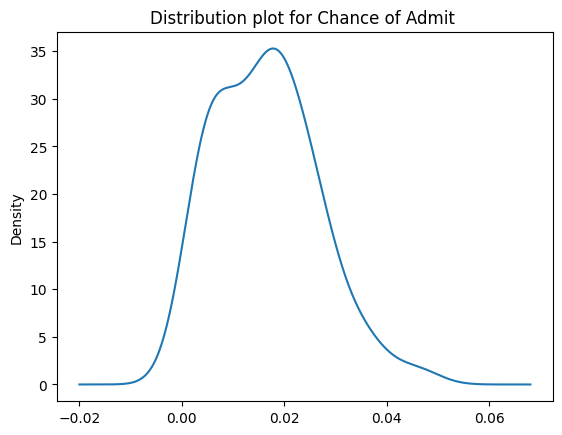

In [ ]:
df['ChanceofAdmit'].value_counts(normalize=True).plot(kind='kde',title='Distribution plot for Chance of Admit ')

<Axes: title={'center': 'CGPA score plot'}, ylabel='Density'>

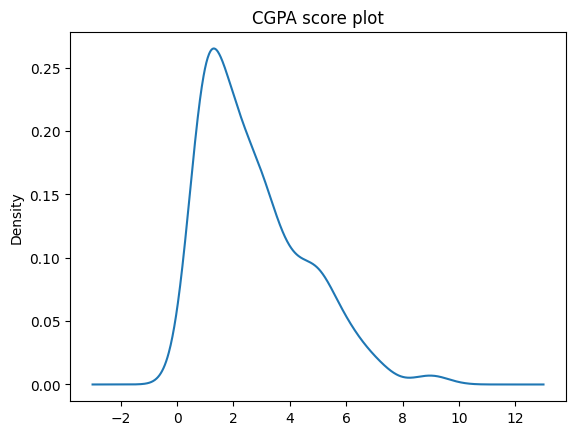

In [ ]:
df['CGPA'].value_counts().plot(kind='kde', title='CGPA score plot')

<Axes: title={'center': 'Distribution plot for GRE score'}, ylabel='Density'>

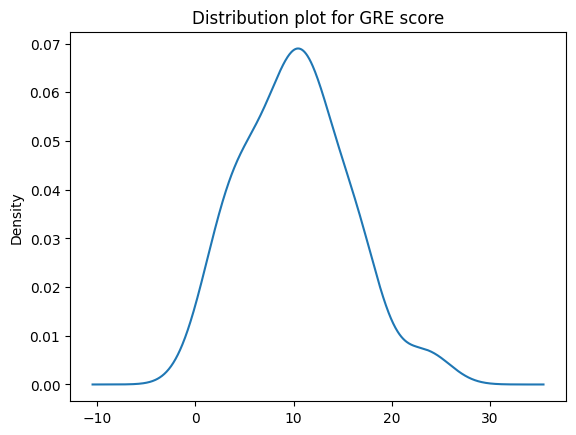

In [ ]:
df['GREScore'].value_counts().plot(kind='kde', title='Distribution plot for GRE score')

<Axes: title={'center': 'Distribution plot for TOEFL Score'}, ylabel='Density'>

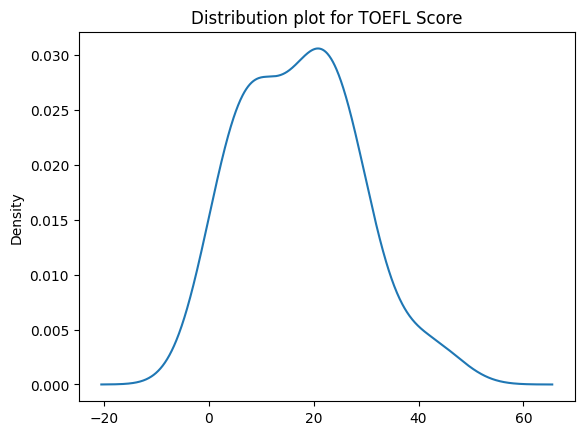

In [ ]:
df['TOEFLScore'].value_counts().plot(kind='kde', title='Distribution plot for TOEFL Score')

<Axes: title={'center': 'Distribution plot for SOP '}, ylabel='Density'>

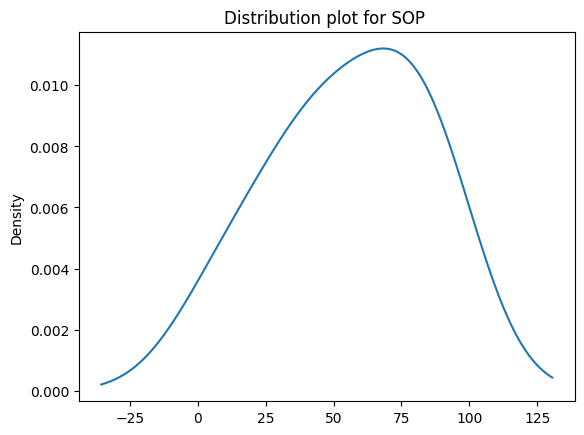

In [ ]:
df['SOP'].value_counts().plot(kind='kde', title='Distribution plot for SOP ')

<Axes: title={'center': 'Distribution plot for LOR'}, ylabel='Density'>

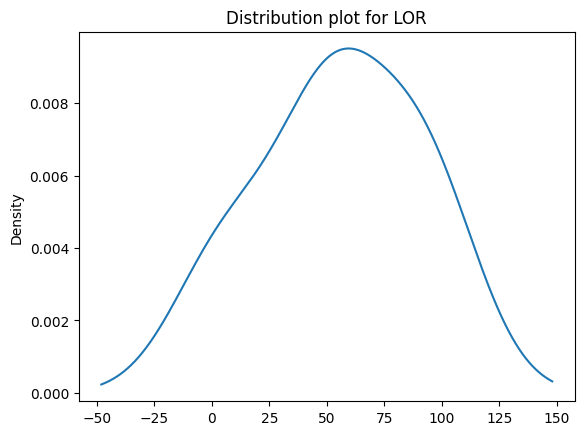

In [ ]:
df['LOR'].value_counts().plot(kind='kde', title='Distribution plot for LOR')

<Axes: xlabel='UniversityRating', ylabel='count'>

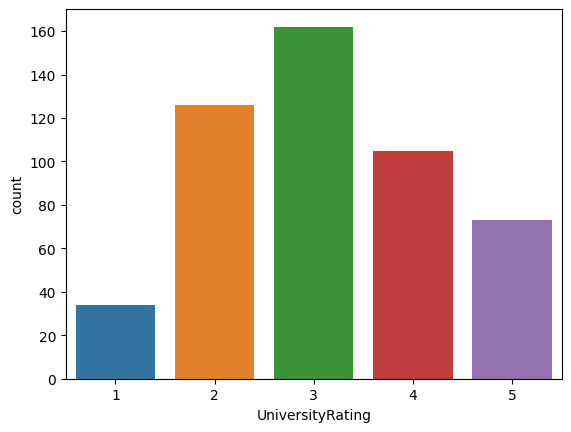

In [ ]:
sns.countplot(x='UniversityRating',data=df)

<Axes: xlabel='Research', ylabel='count'>

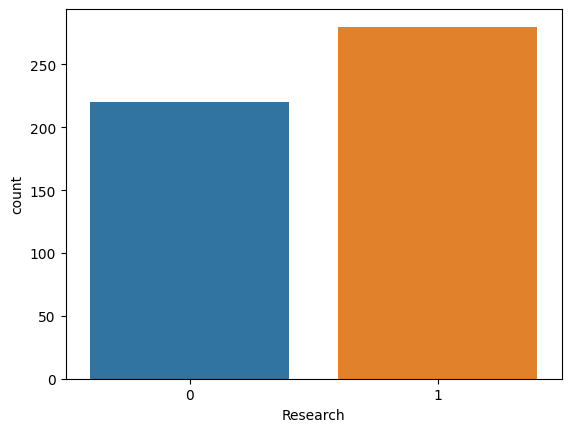

In [ ]:
sns.countplot(x='Research',data=df)

Bivariate Analysis

<Axes: title={'center': 'CGPA Vs Chance of Admit'}, xlabel='CGPA', ylabel='ChanceofAdmit'>

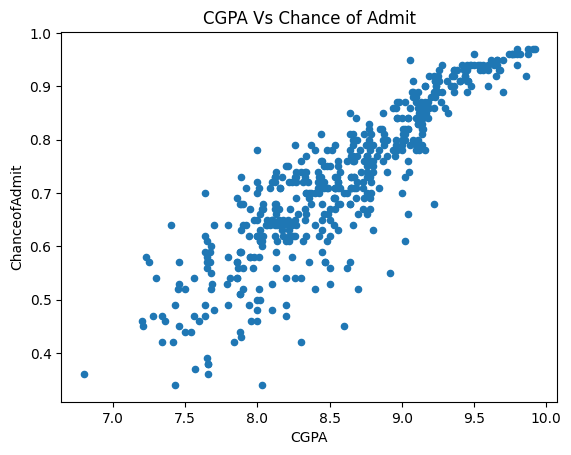

In [ ]:
df.plot(kind='scatter',x='CGPA',y='ChanceofAdmit',title='CGPA Vs Chance of Admit')

<Axes: title={'center': 'CGPA Vs Chance of Admit'}, xlabel='GREScore', ylabel='ChanceofAdmit'>

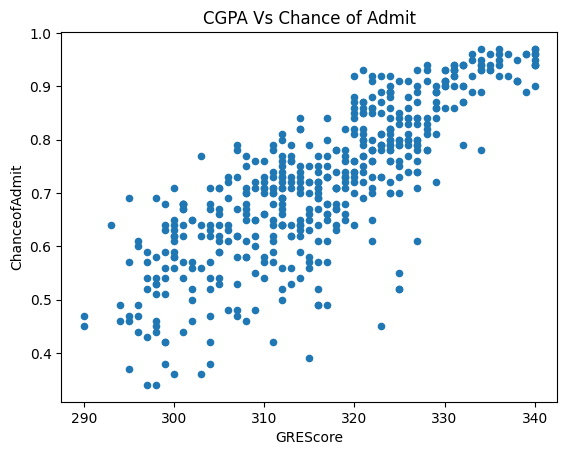

In [ ]:
df.plot(kind='scatter',x='GREScore',y='ChanceofAdmit',title='CGPA Vs Chance of Admit')

<Axes: title={'center': 'CGPA Vs Chance of Admit'}, xlabel='TOEFLScore', ylabel='ChanceofAdmit'>

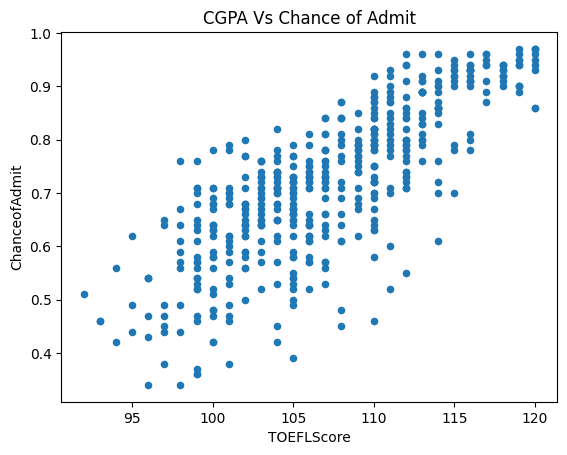

In [ ]:
df.plot(kind='scatter',x='TOEFLScore',y='ChanceofAdmit',title='TOEFL Vs Chance of Admit')

<Axes: title={'center': 'SOP Vs Chance of Admit'}, xlabel='SOP', ylabel='ChanceofAdmit'>

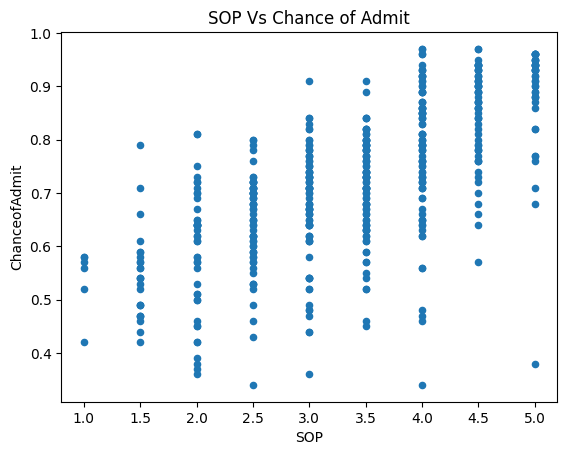

In [ ]:
df.plot(kind='scatter',x='SOP',y='ChanceofAdmit',title='SOP Vs Chance of Admit')

Multivariate Analysis

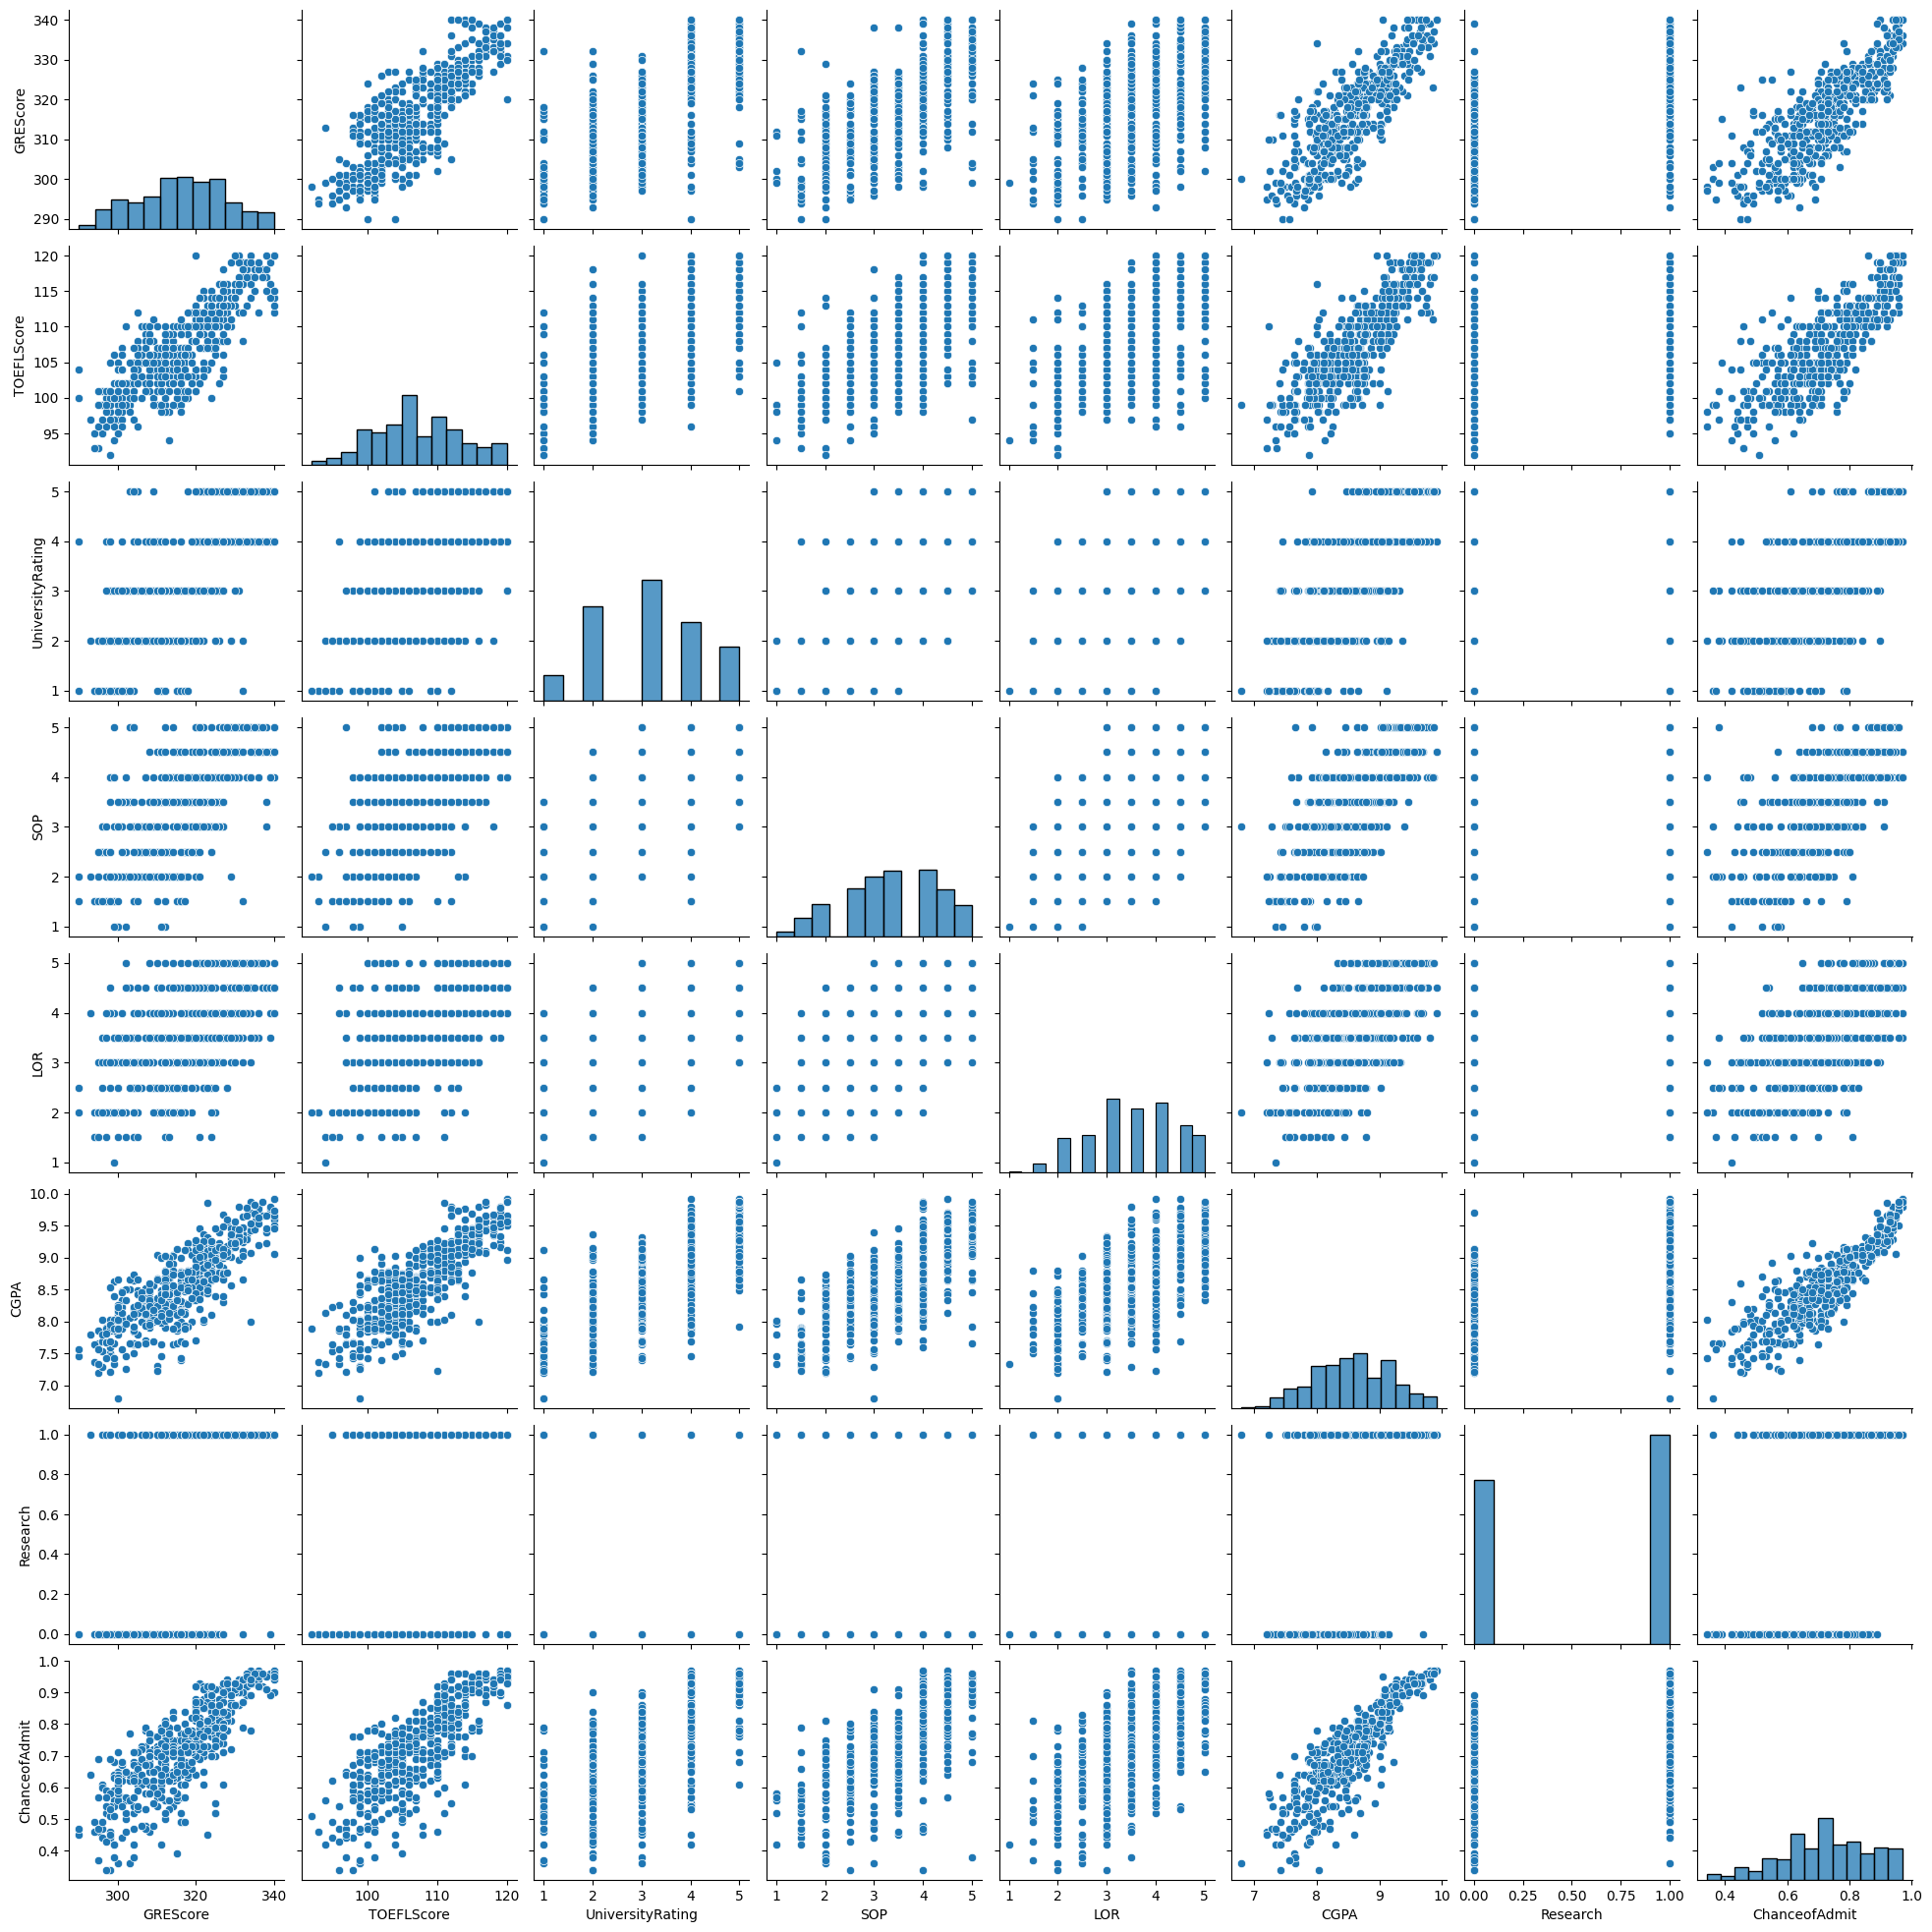

In [ ]:
sns.pairplot(df)

In [ ]:
corr=df.corr()
corr

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
GREScore,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFLScore,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
ChanceofAdmit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

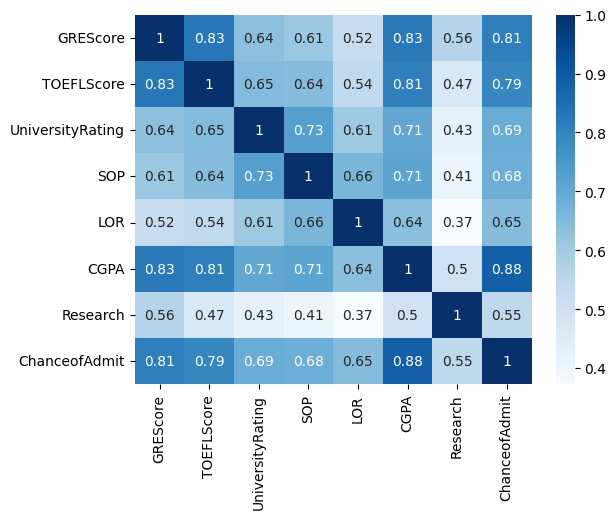

In [ ]:
sns.heatmap(corr,annot=True,cmap='Blues')

In [ ]:
# Spliting dataset into X and y
X=df.iloc[:,:-1]
X

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [ ]:
y=df.iloc[:,-1]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: ChanceofAdmit, Length: 500, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)


In [ ]:
X_train

array([[ 0.38998634,  0.6024183 , -0.09829757, ...,  0.56498381,
         0.4150183 ,  0.89543386],
       [-0.06640493,  0.6024183 ,  0.7754586 , ...,  1.65149114,
        -0.06785154, -1.11677706],
       [-1.25302222, -0.87691722, -0.09829757, ..., -0.52152352,
        -0.13445427, -1.11677706],
       ...,
       [-1.34430047, -1.37002906, -1.8458099 , ..., -1.60803084,
        -2.2157898 , -1.11677706],
       [-0.7053527 , -0.38380538, -0.97205374, ...,  0.56498381,
        -1.49981038, -1.11677706],
       [-0.24896144, -0.21943477, -0.97205374, ...,  0.02173015,
        -0.55072138, -1.11677706]])

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 1.57660363,  1.42427137,  0.7754586 ,  0.63397891,  0.02173015,
         1.59721688,  0.89543386],
       [-0.24896144,  0.10930646,  0.7754586 ,  1.14116204,  0.56498381,
         0.76468267,  0.89543386],
       [-0.15768318, -0.38380538, -0.97205374, -1.39475361, -1.06477718,
        -1.54976243, -1.11677706],
       [-0.43151794,  0.27367707, -0.09829757, -0.38038735, -0.52152352,
         0.18190872, -1.11677706],
       [ 0.8463776 ,  0.76678891, -0.09829757,  0.12679578, -0.52152352,
         0.78133336,  0.89543386],
       [ 1.12021236,  0.6024183 ,  0.7754586 ,  1.14116204,  0.56498381,
         1.08104567,  0.89543386],
       [-2.43963951, -1.20565845, -1.8458099 , -1.90193674, -1.60803084,
        -1.69961859, -1.11677706],
       [-1.43557873, -0.21943477,  0.7754586 , -0.88757048, -0.52152352,
        -0.18440633, -1.11677706],
       [ 0.11615158,  0.27367707, -0.09829757,  0.12679578,  0.56498381,
         1.06439499,  0.89543386],
       [ 0.29870808,  0.7667

In [ ]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498,
       0.72193204, 0.72589118, 0.65632227, 0.93677168, 0.8241518 ,
       0.50979177, 0.83931942, 0.59727295, 0.53339576, 0.57155958,
       0.66548168, 0.55305833, 0.72232308, 0.79506004, 0.78027648,
       0.60248654, 0.94840363, 0.84741471, 0.62777011, 0.74343096,
       0.55533035, 0.73004034, 0.54474225, 0.86116288, 0.65713016,
       0.7371816 , 0.55423839, 0.95718977, 0.64364267, 0.71057279,
       0.97036982, 0.57495143, 0.67075391, 0.85830422, 0.94112903,
       0.57793762, 0.9583926 , 0.83902765, 0.79591651, 0.92570648,
       0.88805969, 0.56366238, 0.70359711, 0.52658929, 0.9536427 ,
       0.59746814, 0.95600396, 0.73916386, 0.66256982, 0.5012903 ,
       0.62950759, 0.68031188, 0.59896721, 0.59203806, 0.44085868,
       0.58866369, 0.8667547 , 0.89783006, 0.65831807, 0.70667392,
       0.6176818 , 0.78587721, 0.69152566, 0.56271019, 0.55429

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)*100

81.88432567829626

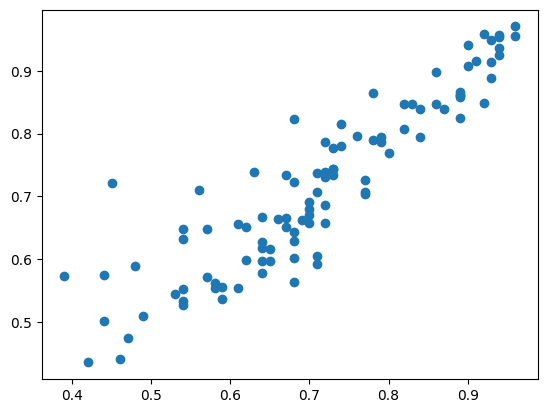

In [ ]:
# Visualizing the fit on test set

plt.scatter(y_test,y_pred)
#plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()